# Exercise 1.2
> Go to http://freesound.org and download a sound samplethat includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Computeand plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

> Use `high_pass`, `low_pass`, and `band_stop` to filter out some of the harmonics. Then convert the spectrum back to a wave and listen to it. How does the sound relate to the changes you made in the spectrum?

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
from thinkdsp import read_wave
from thinkdsp import decorate

wave = read_wave('Sounds/564668__dingeaux__shwing.wav')
wave.normalize()
wave.make_audio()

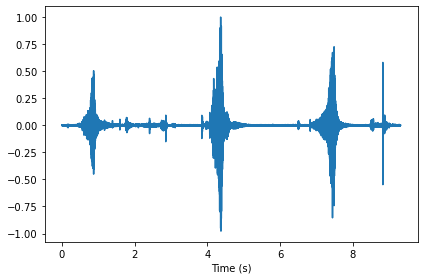

In [3]:
wave.plot()
decorate(xlabel='Time (s)')

In [4]:
segment = wave.segment(start=3.9, duration=0.5)
segment.make_audio()

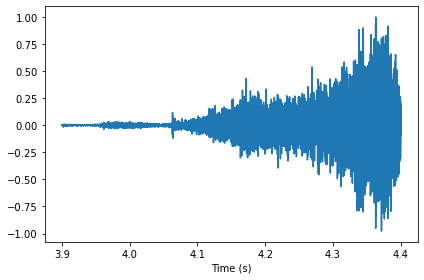

In [5]:
segment.plot()
decorate(xlabel='Time (s)')

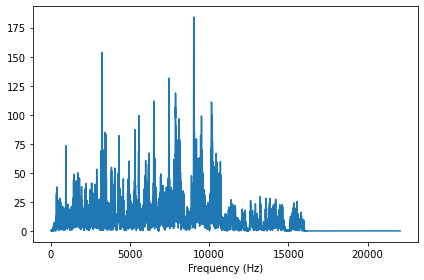

In [6]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

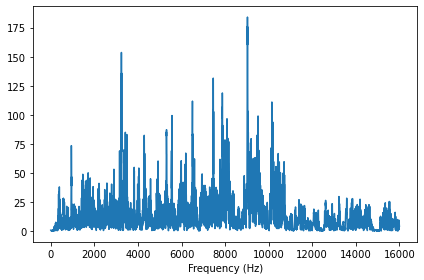

In [7]:
spectrum.plot(high=16000)
decorate(xlabel='Frequency (Hz)')

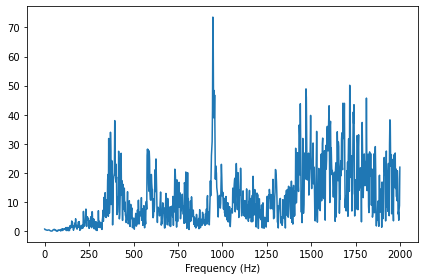

In [8]:
spectrum.low_pass(2000)
spectrum.plot(high=2000)
decorate(xlabel='Frequency (Hz)')

In [9]:
spectrum.make_wave().make_audio()

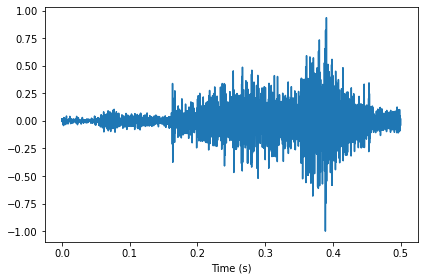

In [10]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.plot()
decorate(xlabel='Time (s)')

In [11]:
spectrum.make_wave().make_audio()

# Exercise 1.3
> Synthesize a compound signal by creating `SinSignal` and `CosSignal` objects and adding them up. Evaluate the signal to get a Wave, and listen to it. Compute its Spectrum and plot it. What happens if you add frequency components that are not multiples of the fundamental?

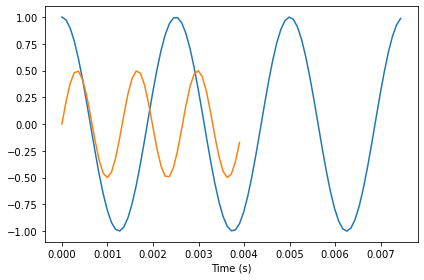

In [12]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=400, amp=1.0)
sin_sig = SinSignal(freq=755, amp=0.5)

cos_sig.plot()
decorate(xlabel='Time (s)')

sin_sig.plot()
decorate(xlabel='Time (s)')

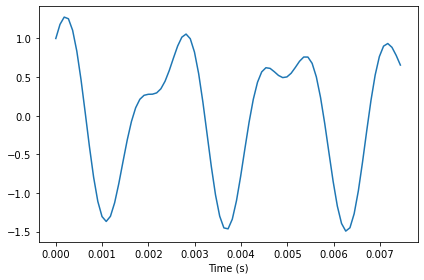

In [13]:
signal = cos_sig + sin_sig
signal.plot()
decorate(xlabel='Time (s)')

In [14]:
wave1 = signal.make_wave(duration=0.5, start=0, framerate=11025)
wave1.make_audio()

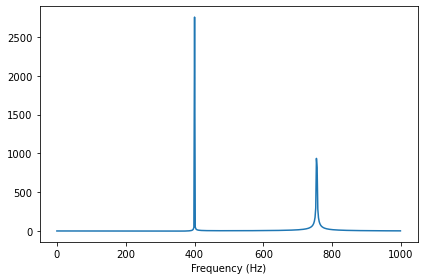

In [15]:
spectrum = wave1.make_spectrum()
spectrum.plot(high=1000)
decorate(xlabel='Frequency (Hz)')

In [16]:
signal += SinSignal(freq=450)
signal.make_wave().make_audio()

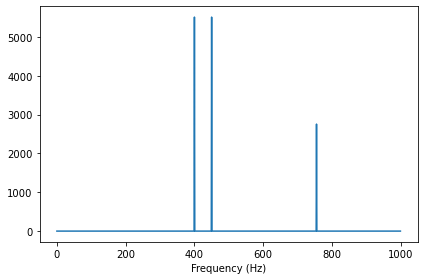

In [17]:
wave2 = signal.make_wave()
wave2.apodize
spectrum2 = wave2.make_spectrum()
spectrum2.plot(high=1000)
decorate(xlabel='Frequency (Hz)')

# Exercise 1.4
> Write a function called `stretch` that takes a `Wave` and a stretch factor and speeds up or slows down the wave by modifying ts and framerate. Hint: it should only take two lines of code

In [18]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

In [19]:
stretch(wave, 0.2)
wave.make_audio()

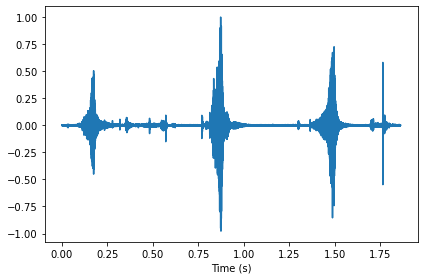

In [20]:
wave.plot()
decorate(xlabel='Time (s)')